# Name: Anisha Srivastava

# The Sparks Foundation

# Task 2: Exploratory Data Analysis - Retail

Objective: As a business manager, try to find out the weak areas where you can work to make more profit.

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib import cm

In [2]:
df=pd.read_csv(r"C:\Users\ANISHA\Desktop\The Sparks Foundation\SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#Number of rows and columns in the dataset
df.shape

(9994, 13)

In [4]:
#Checking whether there are null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
#Providing statistical summary of the dataset
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#Checking if there are duplicate values 
df.duplicated().sum()

17

In [8]:
#Dropping the duplicate values
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(9977, 13)

In [10]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
df.drop(["Country", "Postal Code"],axis=1,inplace=True)

In [12]:
df.head(5)

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Ship Mode**

In [13]:
df["Ship Mode"].value_counts()


Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

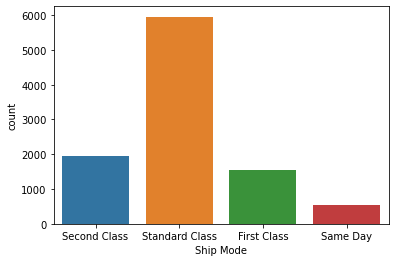

In [14]:
sns.countplot(x=df["Ship Mode"])

Mosted opted Ship Mode: Standard Class, Least opted Ship Mode: Same Day


**Segment**

In [15]:
df["Segment"].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

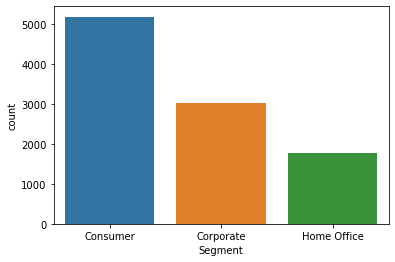

In [16]:
sns.countplot(x=df["Segment"])

**Region**

In [17]:
df["Region"].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

<AxesSubplot:xlabel='Region', ylabel='count'>

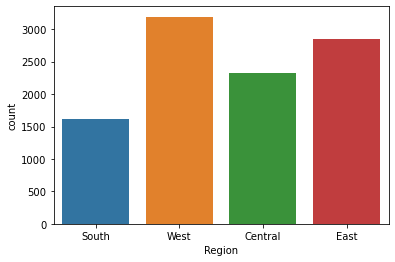

In [18]:
sns.countplot(x=df["Region"])

**Category**

In [19]:
cat= df["Category"].value_counts()
cat

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

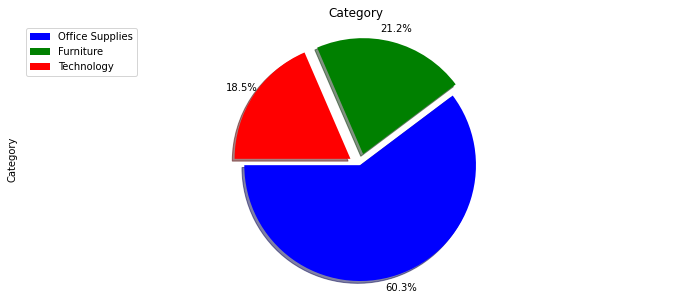

In [20]:
explode_list=[0,0.1,0.1]
colors_list=["blue","green","red"]
cat.plot(kind="pie", figsize=(12,5),autopct="%1.1f%%",shadow=True, startangle=180,explode=explode_list,
         labels=None, pctdistance=1.12, colors=colors_list)
plt.title("Category")
plt.axis("equal")
plt.legend(labels=cat.index,loc="upper left")
plt.show()

**Sub-Category**

In [22]:
sc = df["Sub-Category"].value_counts()
sc

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

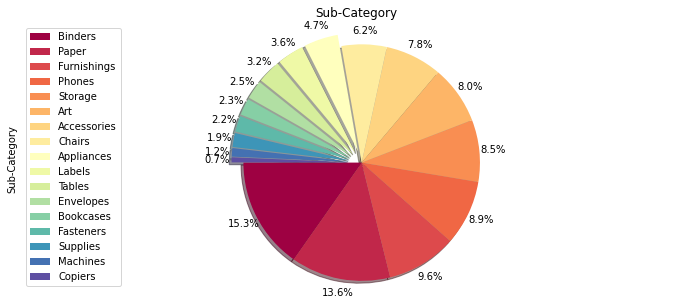

In [23]:
cmap = cm.get_cmap('Spectral')
explode_list=[0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
sc.plot(kind="pie", figsize=(12,5),autopct="%1.1f%%",shadow=True, startangle=180,explode=explode_list,
         labels=None, pctdistance=1.12, cmap=cmap)
plt.title("Sub-Category")
plt.axis("equal")
plt.legend(labels=sc.index,loc="upper left")
plt.show()


In [24]:
#Finding the correlation
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

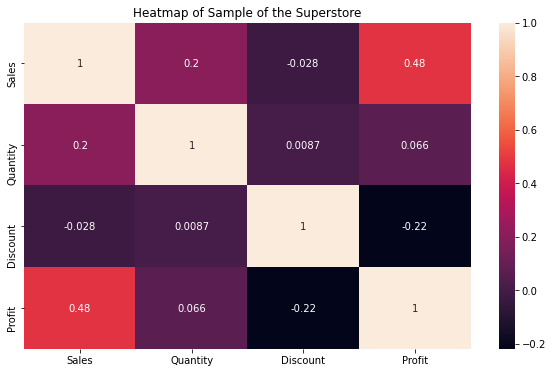

In [25]:
#Correlation Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap of Sample of the Superstore")
plt.show

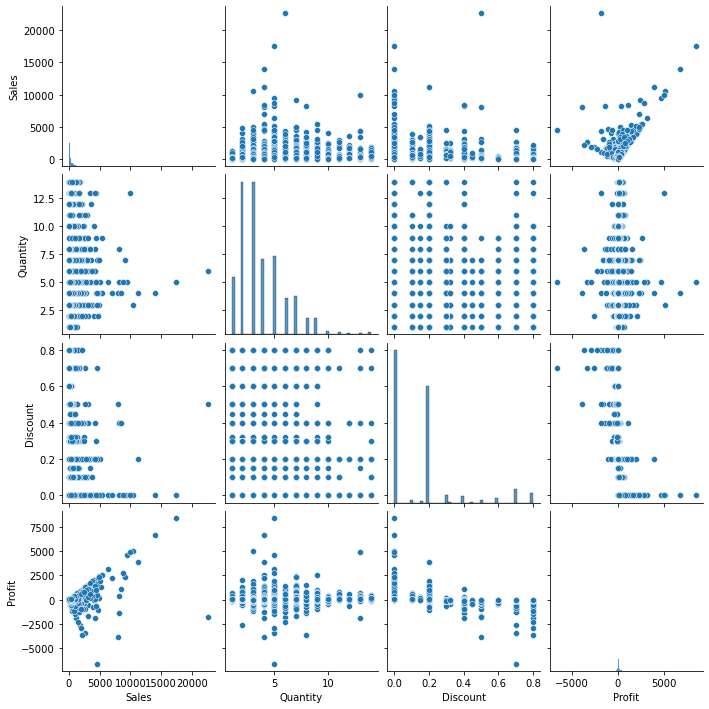

In [26]:
sns.pairplot(df)

**State-wise Sales**

<function matplotlib.pyplot.show(close=None, block=None)>

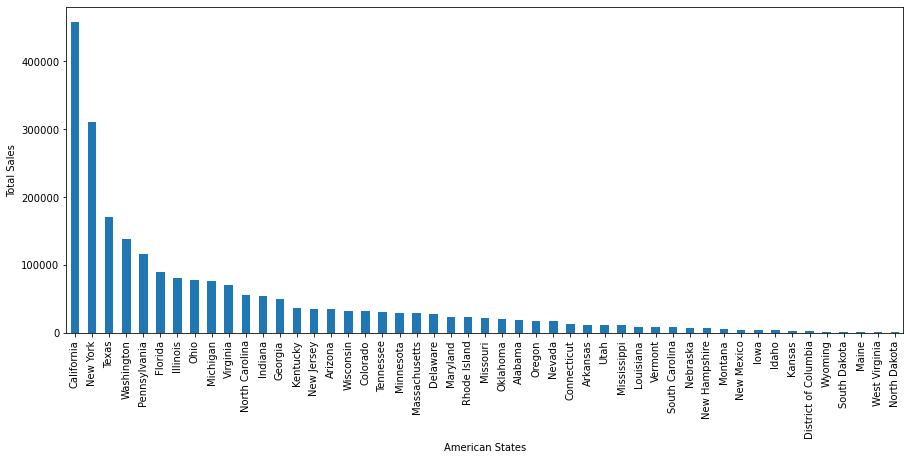

In [27]:
df_state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending = False).plot.bar(figsize = (15,6))
plt.ylabel('Total Sales')
plt.xlabel('American States')
plt.show

**State-wise Profit and Loss**

<function matplotlib.pyplot.show(close=None, block=None)>

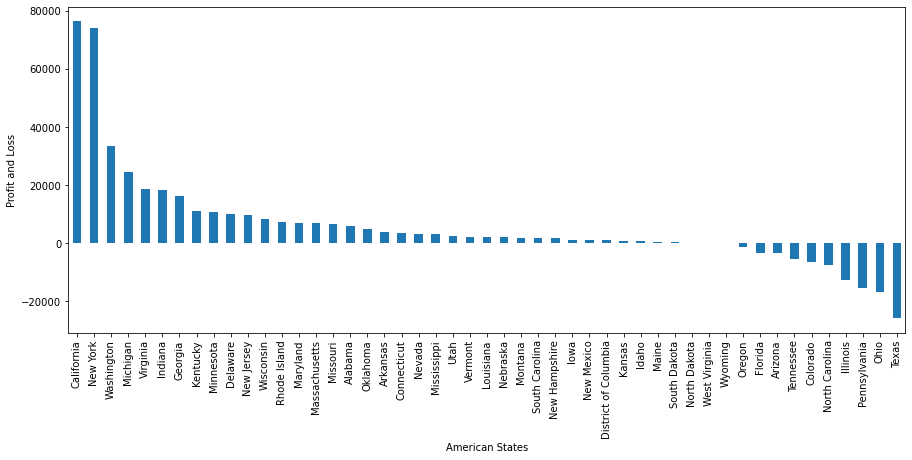

In [28]:
df_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15,6))
plt.ylabel('Profit and Loss')
plt.xlabel('American States')
plt.show

**Ship Mode wise Profit and Sales**

                     Profit         Sales
Ship Mode                                
First Class      48953.6561  3.513805e+05
Same Day         15871.8869  1.283217e+05
Second Class     57446.6516  4.591770e+05
Standard Class  163969.2280  1.357316e+06


Text(0.5, 1.0, 'Ship-Mode wise Profit and Sales')

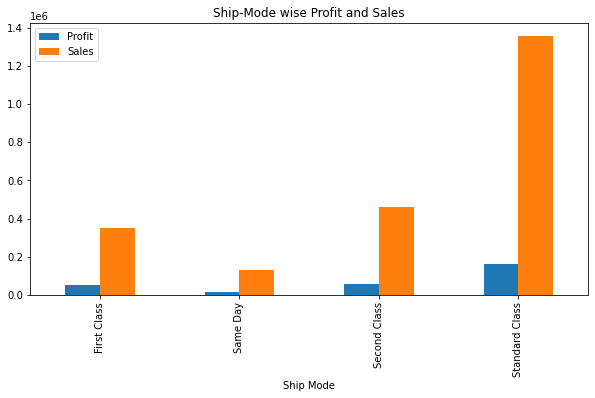

In [29]:
sm=df.groupby('Ship Mode')['Profit','Sales'].agg('sum')
print(sm)
sm.plot.bar(figsize=(10,5))
plt.title('Ship-Mode wise Profit and Sales')

**Segment wise Profit and Sales**

                  Profit         Sales
Segment                               
Consumer     134007.4413  1.160833e+06
Corporate     91954.9798  7.060701e+05
Home Office   60279.0015  4.292927e+05


Text(0.5, 1.0, 'Segment wise Profit and Sales')

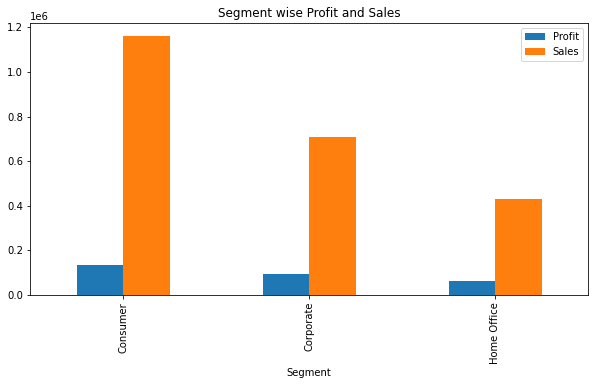

In [30]:
seg=df.groupby('Segment')['Profit','Sales'].agg('sum')
print(seg)
seg.plot.bar(figsize=(10,5))
plt.title('Segment wise Profit and Sales')

**Category wise Profit and Sales**

                      Profit        Sales
Category                                 
Furniture         18421.8137  741306.3133
Office Supplies  122364.6608  718735.2440
Technology       145454.9481  836154.0330


Text(0.5, 1.0, 'Category wise Profit and Sales')

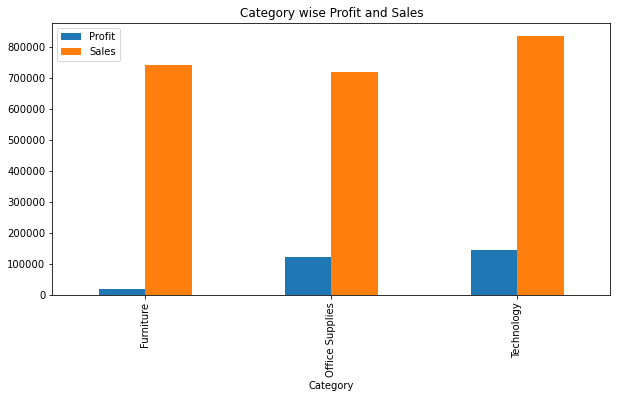

In [31]:
cat=df.groupby('Category')['Profit','Sales'].agg('sum')
print(cat)
cat.plot.bar(figsize=(10,5))
plt.title('Category wise Profit and Sales')

**Sub-category wise Profit and Sales**

                  Profit        Sales
Sub-Category                         
Accessories   41936.6357  167380.3180
Appliances    18138.0054  107532.1610
Art            6524.6118   27107.0320
Binders       30228.0003  203409.1690
Bookcases     -3472.5560  114879.9963
Chairs        26567.1278  327777.7610
Copiers       55617.8249  149528.0300
Envelopes      6964.1767   16476.4020
Fasteners       949.5182    3024.2800
Furnishings   13052.7230   91683.0240
Labels         5526.3820   12444.9120
Machines       3384.7569  189238.6310
Paper         33944.2395   78224.1420
Phones        44515.7306  330007.0540
Storage       21278.8264  223843.6080
Supplies      -1189.0995   46673.5380
Tables       -17725.4811  206965.5320


Text(0.5, 1.0, 'Sub-Category wise Profit and Sales')

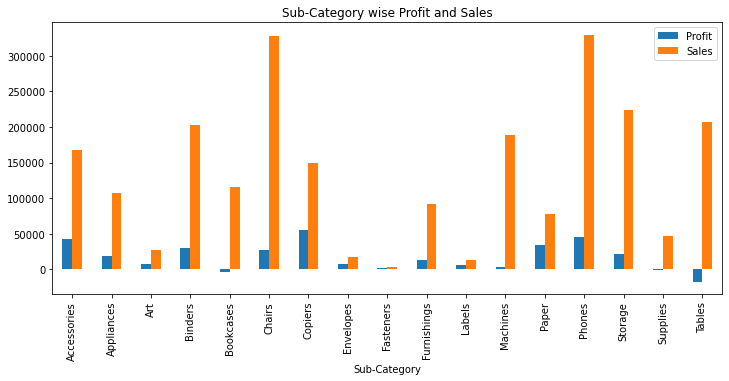

In [32]:
sc=df.groupby('Sub-Category')['Profit','Sales'].agg('sum')
print(sc)
sc.plot.bar(figsize=(12,5))
plt.title('Sub-Category wise Profit and Sales')

**Region wise Profit and Sales**

              Profit        Sales
Region                           
Central   39655.8752  500782.8528
East      91506.3092  678435.1960
South     46749.4303  391721.9050
West     108329.8079  725255.6365


Text(0.5, 1.0, 'Region wise Profit and Sales')

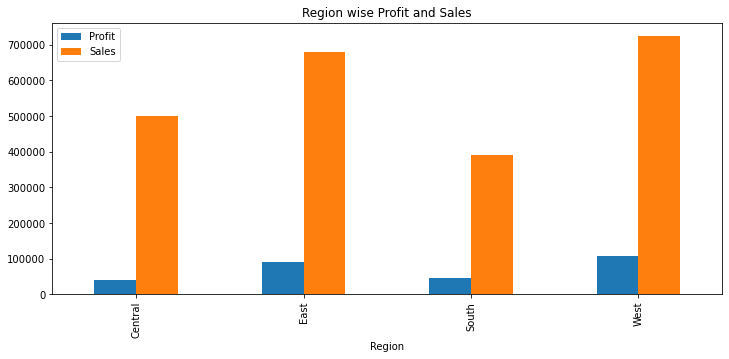

In [33]:
reg=df.groupby('Region')['Profit','Sales'].agg('sum')
print(reg)
reg.plot.bar(figsize=(12,5))
plt.title('Region wise Profit and Sales')

**Relationship bewteen Discount and Profit**

Text(0.5, 1.0, 'Discount and Profit')

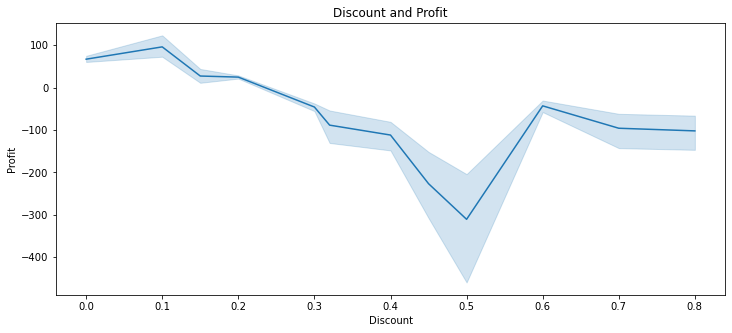

In [34]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Discount', y='Profit', data=df)
plt.title('Discount and Profit')

**Relationship bewteen Profit and Sales**

Text(0.5, 1.0, 'Profit and Sales')

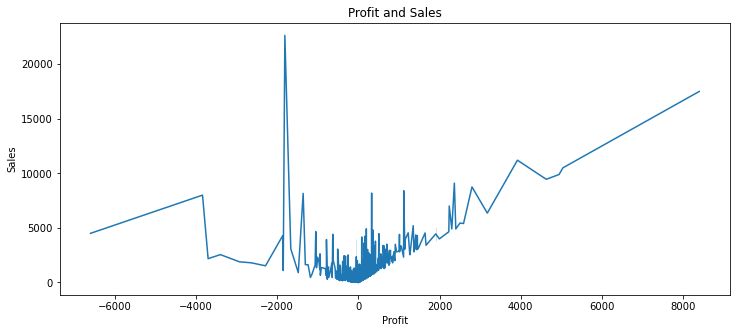

In [35]:
plt.figure(figsize=(12,5))
sns.lineplot(x='Profit', y='Sales', data=df)
plt.title('Profit and Sales')

**Category-wise Discount**

Sub-Category
Accessories     60.80
Appliances      77.60
Art             59.60
Binders        566.20
Bookcases       48.14
Chairs         104.70
Copiers         11.00
Envelopes       20.40
Fasteners       17.80
Furnishings    132.40
Labels          25.00
Machines        35.20
Paper          101.80
Phones         137.40
Storage         63.20
Supplies        14.60
Tables          83.35
Name: Discount, dtype: float64


Text(0.5, 1.0, 'Sub-Category wise Discount')

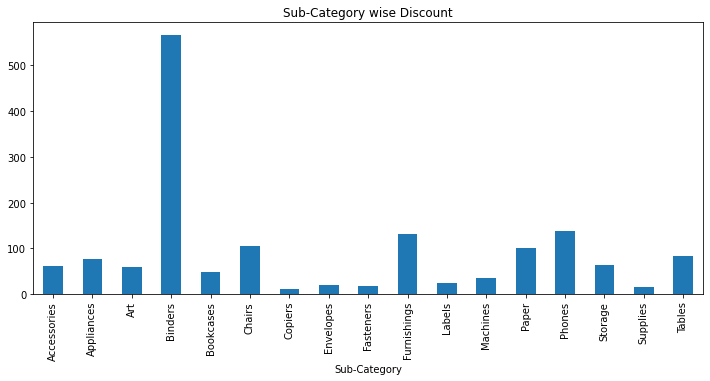

In [36]:
c=df.groupby('Sub-Category')['Discount'].agg('sum')
print(c)
c.plot.bar(figsize=(12,5))
plt.title('Sub-Category wise Discount')

**Conclusion**

1) The most correlated variables are Profit and Sales and the least correlated variables are Discount and Quantity.    

2) There is a positive relationship between Sales and Profit

3) California has the highest Profit and Sales in the States, followed by New York. Although Texas shows a high number of    sales, however, the profits were very less. There are many States which are in a loss despite moderate Sales.

4) The most opted Ship Mode was Standard Class with the highest Sales and Profit.

5) Consumer segment has more Sales and Profit followed by Corporate and Home Office.

6) In Categories, Technology has the highest Sales and Profit.

7) In Sub-Category, Phones and Chairs have the highest Sales. But in terms of Profit, Copiers and Accessories have done      well.

8) Western region in America shows the highest Sales and Profit whereas the Central region shows the least Sales and          Profit. 

9) There is a neagative correaltion between Discount and Profit. As Dicount increases, Profit decreases.



